In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [7]:
data = pd.read_csv(r"C:\Users\Edwin\Desktop\OT2-DOE\PlanPrepareProcess\05_11_21_CdSe_Blanked")
wavelength_columns = [col for col in data.columns if "nm" in col]
wavelengths = [float(w.replace("nm", "")) for w in wavelength_columns]
data

,UID,Labware,Slot,Well,CdAc concentration molarity,Se concentration molarity,OleicAc concentration molarity,Oleylamine concentration molarity,CdAc amount mass g,CdAc amount volume uL,...,891nm,892nm,893nm,894nm,895nm,896nm,897nm,898nm,899nm,900nm
0,S2_A1_05-14-2021_CdSe,Fischer 24 Well Plate 7400 ÂµL,2,A1,0.0,0.0,0.00,0.00,0.00000,0.000000,...,0.007,0.007,0.008,0.008,0.007,0.007,0.007,0.007,0.007,0.008
1,S2_A2_05-14-2021_CdSe,Fischer 24 Well Plate 7400 ÂµL,2,A2,0.0,0.0,0.00,0.25,0.00000,0.000000,...,0.023,0.023,0.023,0.023,0.022,0.021,0.021,0.021,0.022,0.023
2,S2_A3_05-14-2021_CdSe,Fischer 24 Well Plate 7400 ÂµL,2,A3,0.0,0.0,0.00,0.50,0.00000,0.000000,...,0.058,0.059,0.060,0.059,0.057,0.054,0.053,0.053,0.055,0.057
3,S2_A4_05-14-2021_CdSe,Fischer 24 Well Plate 7400 ÂµL,2,A4,0.0,0.0,0.25,0.00,0.00000,0.000000,...,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001
4,S2_A5_05-14-2021_CdSe,Fischer 24 Well Plate 7400 ÂµL,2,A5,0.0,0.0,0.25,0.25,0.00000,0.000000,...,0.005,0.005,0.006,0.006,0.006,0.005,0.005,0.005,0.006,0.006
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76,S6_A5_05-14-2021_CdSe,Fischer 24 Well Plate 7400 ÂµL,6,A5,0.1,0.1,0.25,0.25,0.11525,49.252137,...,0.000,0.000,0.000,0.001,0.001,0.000,0.000,0.000,0.001,0.001
77,S6_A6_05-14-2021_CdSe,Fischer 24 Well Plate 7400 ÂµL,6,A6,0.1,0.1,0.25,0.50,0.11525,49.252137,...,0.001,0.000,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001
78,S6_B1_05-14-2021_CdSe,Fischer 24 Well Plate 7400 ÂµL,6,B1,0.1,0.1,0.50,0.00,0.11525,49.252137,...,0.000,-0.001,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
79,S6_B2_05-14-2021_CdSe,Fischer 24 Well Plate 7400 ÂµL,6,B2,0.1,0.1,0.50,0.25,0.11525,49.252137,...,0.004,0.004,0.005,0.005,0.005,0.005,0.004,0.005,0.005,0.005


[<AxesSubplot:> <AxesSubplot:>]


IndexError: index 2 is out of bounds for axis 0 with size 2

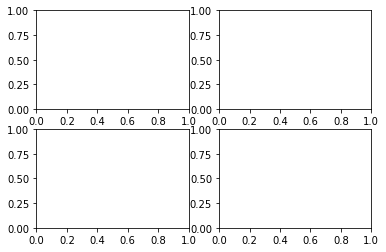

In [38]:
# so within each of these plots you can make a few subplots of the different compositions of ligand
# so you would have a plot focused on the base level of how much Cd so three, then those with X amount of selenium and then split those up into whetehr they had oelic and olelymine and tehe concentration
# so in total 3 * 3 = 9 * 2 = 18 plots
# N = 50
# plt.rcParams["axes.prop_cycle"] = plt.cycler("color", plt.cm.hot(np.linspace(0,1,N)))


cd_grouper = data.groupby('CdAc concentration molarity') 
# se_grouper = data.groupby('Se concentration molarity')
for cd_conc, unique_cd_df, in cd_grouper:
    se_grouper = unique_cd_df.groupby('Se concentration molarity')
    n_se = len(se_grouper)
    
    n_plots = n_se
    n_cols = 2
    n_rows = (n_plots + 1) // n_cols
    fig,ax=plt.subplots(nrows=n_rows, ncols=n_cols)
    
    # so now we have n_plots which is the number of selenium concs in ONE unique Cd conc
    # now within these subplots we iterate through them and plot other information like the olelyamine and oelic acid concentration 
    
    # just need to iterate linearly or do a counter 
#     counter = 0
# #     for row in ax:
# #         for col in row:
# #             counter = 1 + counter 
# #             print(counter)
#     for se, unique_se_df in se_grouper:
#         counter = 1 + counter
#         print(ax[counter])
            
        
#     Se_df = df_i['Se concentration molarity']
#     for j, row_j in df_i.iterrows():
#         x = wavelengths
#         y = row_j[wavelength_columns]
#         ax.plot(x,y, label=Se_df[j])
#         ax.set_title(str(round(i,3)) + ' Molarity Cd')
#         ax.set_xlim(300,700)
#         ax.set_ylim(0,1)
#         ax.legend()


In [31]:
len(cd_grouper)

3